# Laboratorio 5
## Procesamiento Digital de Señales
## 2023-2

Santiago Naranjo Sanchez

cc:1017267682

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import ztrans
from IPython.display import Audio
pi = np.pi

%matplotlib inline

In [15]:
num = [1,8]
den = [1,-5,2]

#1.1
 Importe las funciones del archivo adjunto ztrans.py y úselas para graficar la respuesta en frecuencia y fase, la respuesta al impulso, la respuesta al escalón, y el diagrama de polos y ceros

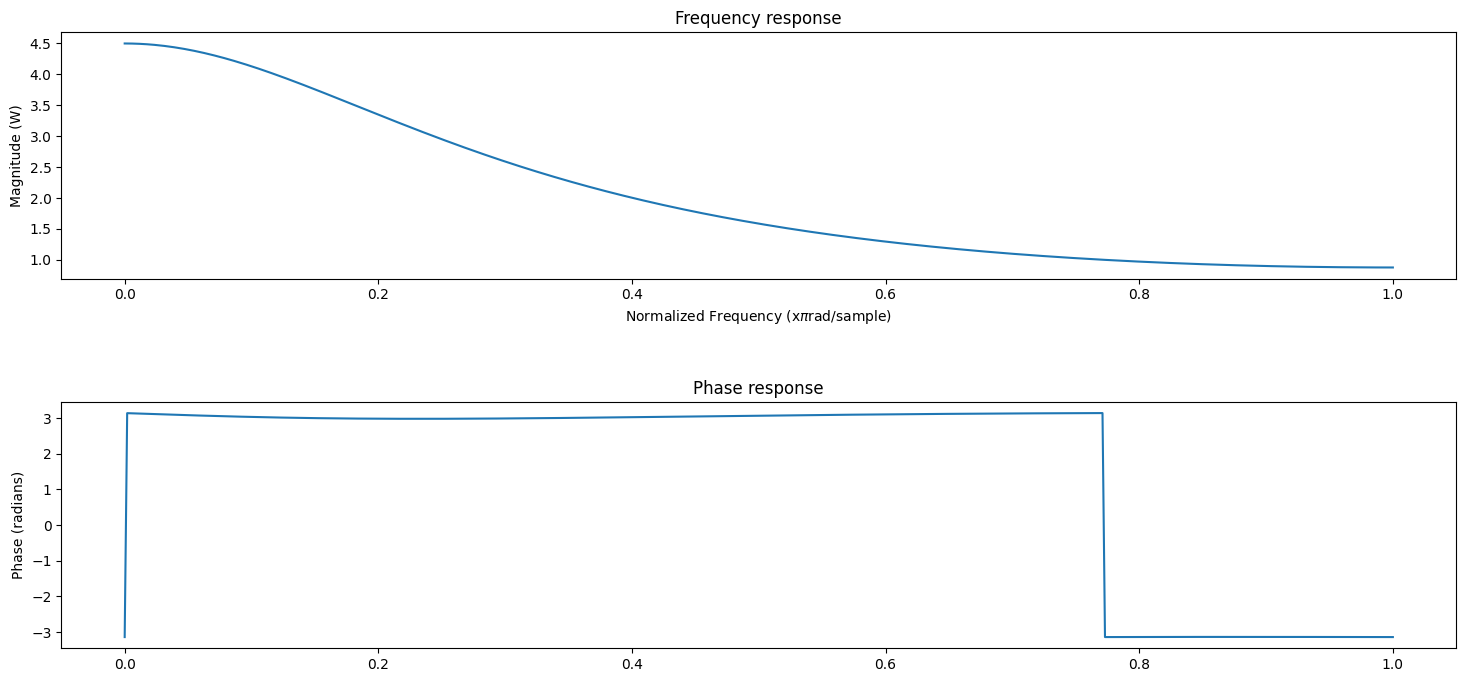

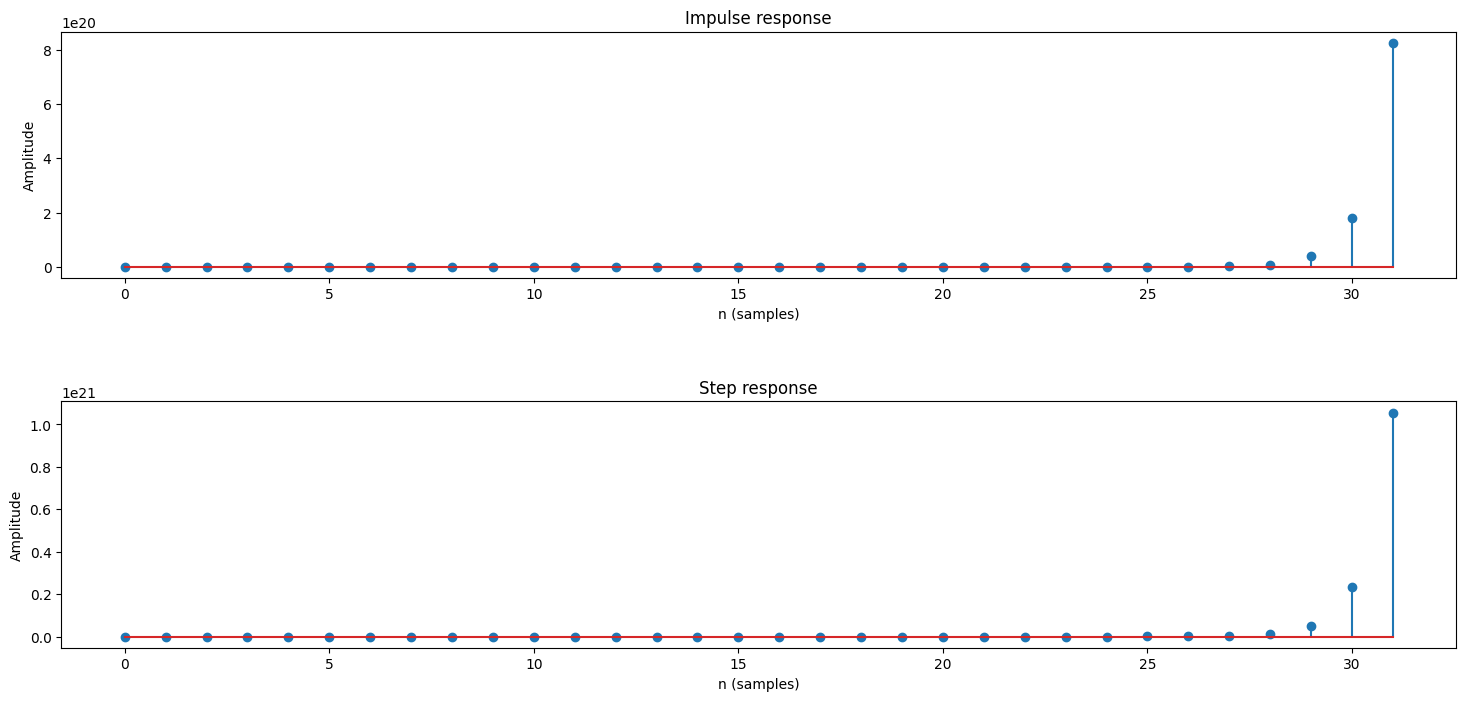

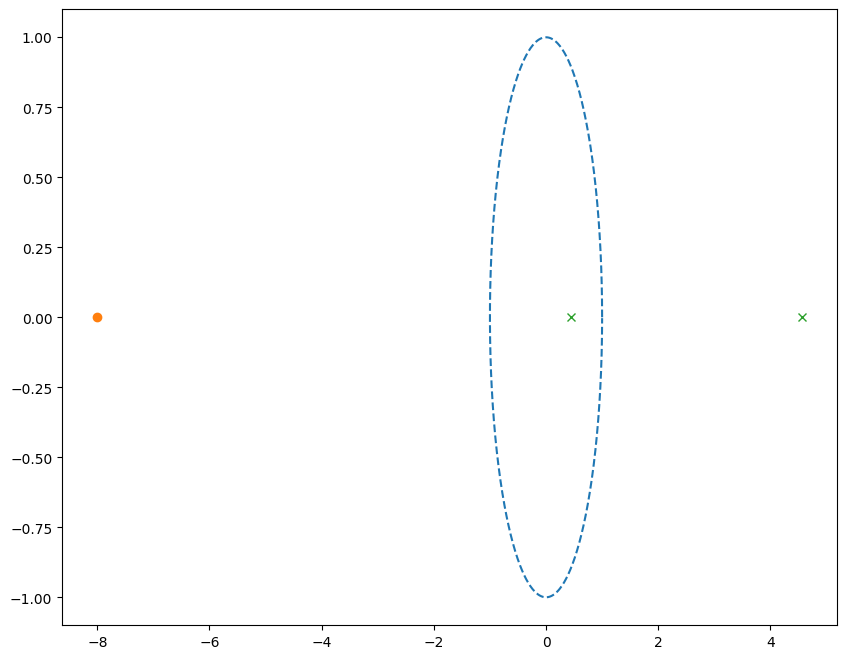

Ceros: [-8.]
Polos: [4.56155281 0.43844719]


In [24]:
ztrans.mfreqz(num,den)

ztrans.impz(num, den)

ztrans.zeropoles(num, den)

# Calcula los polos y ceros usando tf2zpk
zeros, poles, gain = scipy.signal.tf2zpk(num, den)

# Imprime los ceros y polos
print("Ceros:", zeros)
print("Polos:", poles)

#1.2.

¿Dónde están ubicados los polos y los ceros?

los ceros estan: [-8.]

los 2 polos estan en: [4.56155281 0.43844719]

**1.3.**
¿Qué se puede decir de la respuesta en frecuencia y fase de la funcíon de transferencia?
* para la respuesta a la frecuencia se puede decir que es un filtro pasa bajas
* para la respuesta a la fse,se puede decfir que es lineal

**1.4.**
¿Qué se puede decir acerca de la respuesta al impulso y al escalón?

desde el diagrama de polos y ceros se puede decir que el sistema es inestable y empieza a oscilar

**1.5.**

 ¿Qué se puede decir acerca de la estabilidad del sistema?

Que es inestable por tener un polo fuera del circulo unitario

### 2 Transformada Z: Introducción a los filtros digitales

#2.1.
 Genere una señal sinusoidal cuya frecuencia se incremente en el tiempo de forma cuadrática. La señal debe tener una duración de 40 segundos y una frecuencia de muestreo de 5000 Hz.

In [26]:
#Parámetros de la señal
fs = 5000 #Valor en Hz de la frecuencia.
t = np.arange(0, 40, 1/fs)
signa = np.sin(2*pi*t**3) #Señal senoidal de forma cuadrática

#2.2
 Grafique y escuche la señal

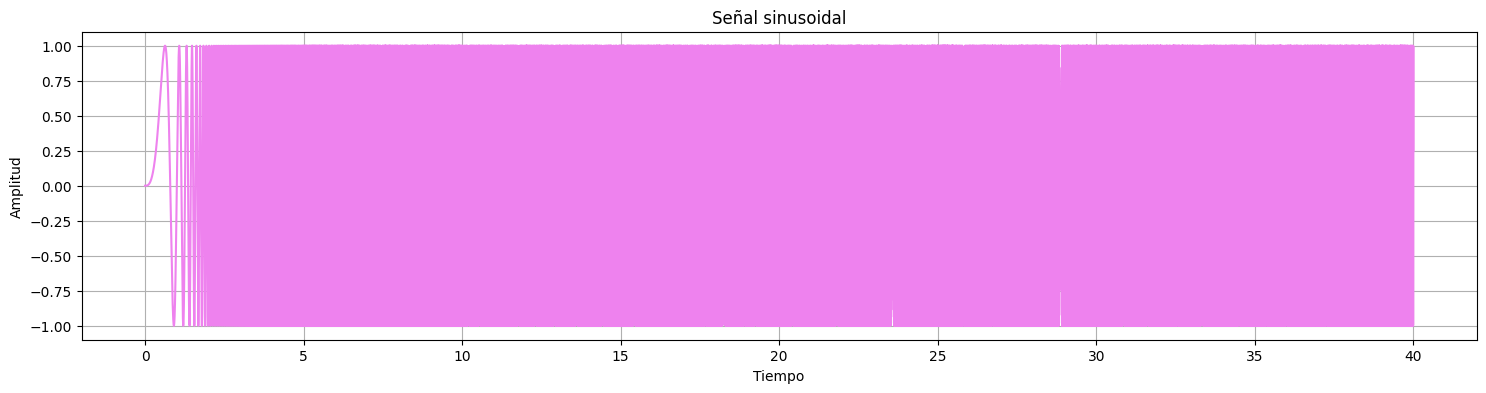

In [28]:
plt.figure(figsize=(18,4))
plt.plot(t,signa, color ='violet')
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Señal sinusoidal")
plt.grid()
plt.show()
Audio(signa,rate=fs)

¿Qué se puede decir acerca del audio?
Se aprecia el sonido de un zumbido y luego un pitido que va aumentando y disminuyendo el tono

#2.3
 Genere la función de transferencia de un filtro de respuesta finita al impulso (FIR) usando las siguientes
instrucciones.

In [32]:
import scipy.signal as signal
n = 9
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)
den=np.zeros(n)
den[0] = 1

#2.4
 Grafique la respuesta en frecuencia y fase, la respuesta al impulso, la respuesta al escalón, y el diagrama
de polos y ceros del filtro FIR.

Frecuencia y Fase:


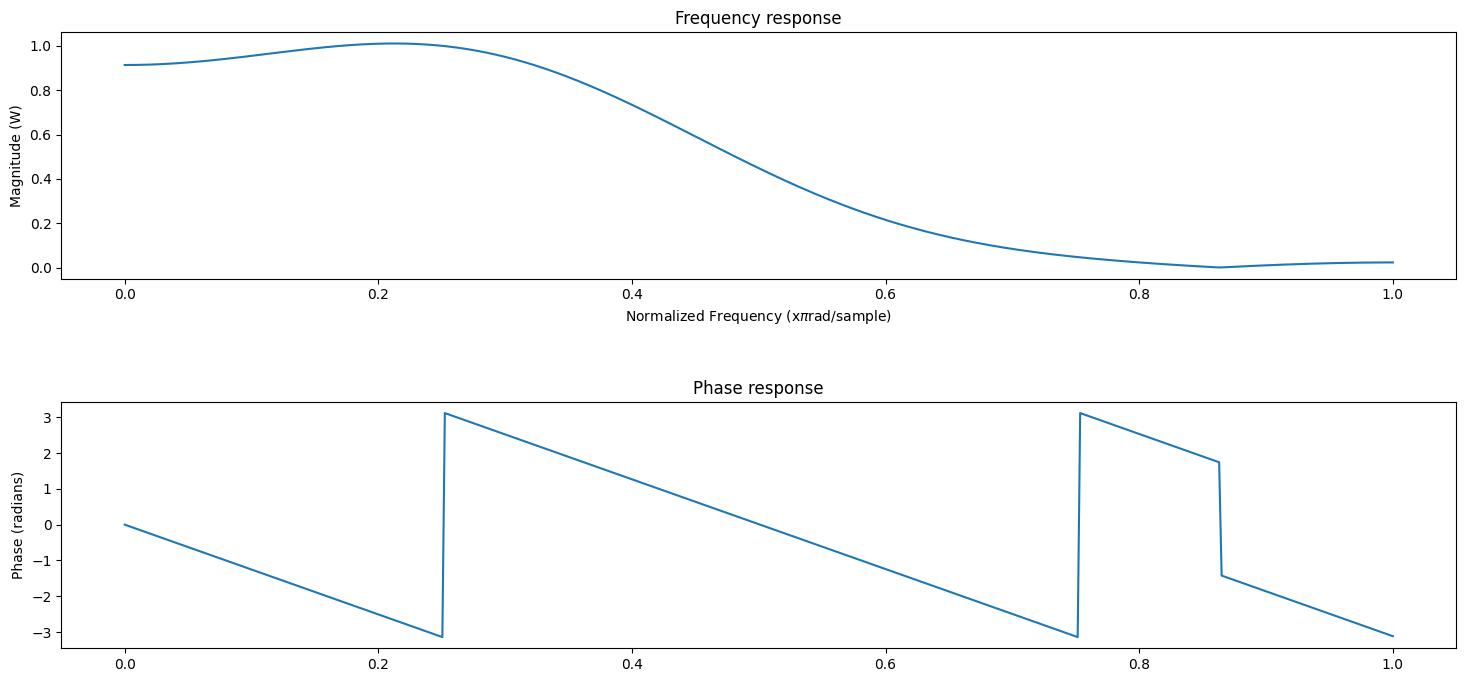

In [33]:
print('Frecuencia y Fase:')
ztrans.mfreqz(num,den)

Respuesta al impulso y al escalón: 


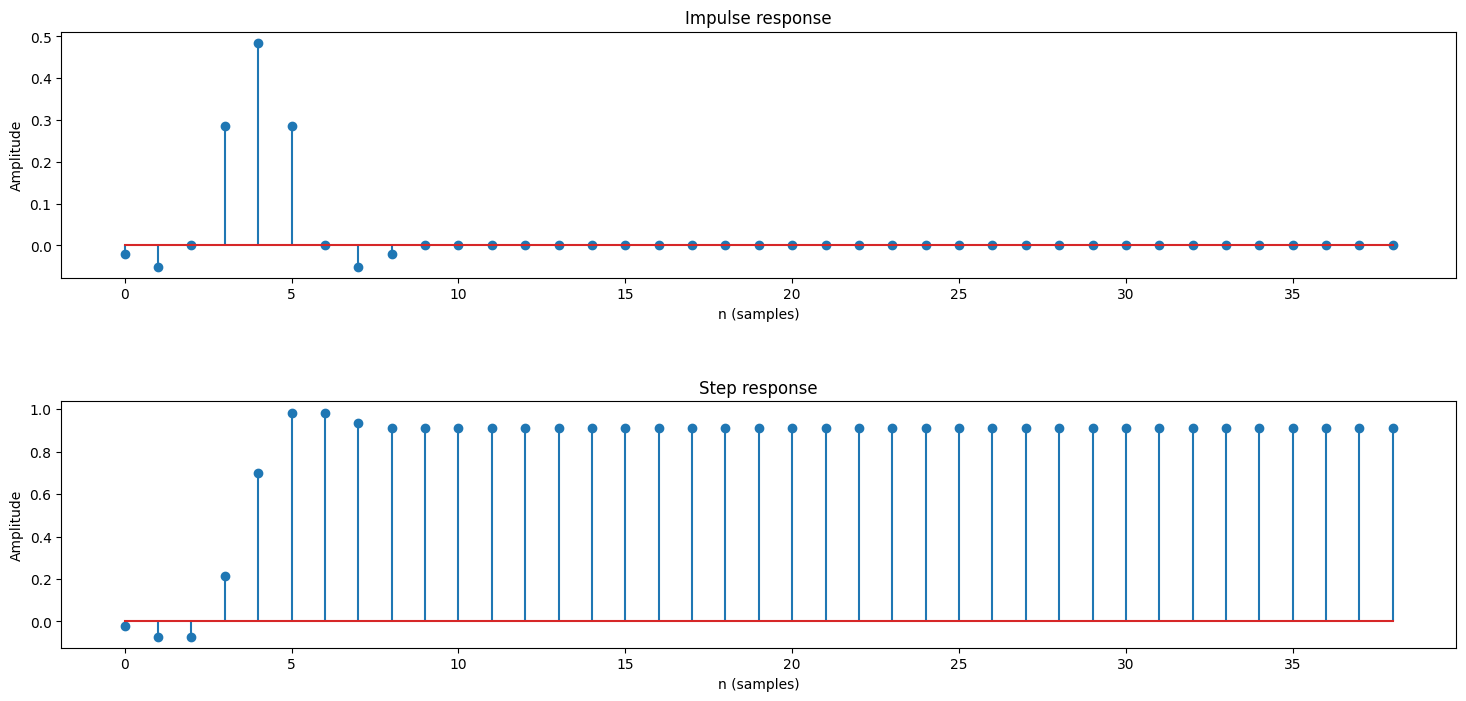

In [34]:
print('Respuesta al impulso y al escalón: ')
ztrans.impz(num, den)

Diagrama de polos y ceros: 


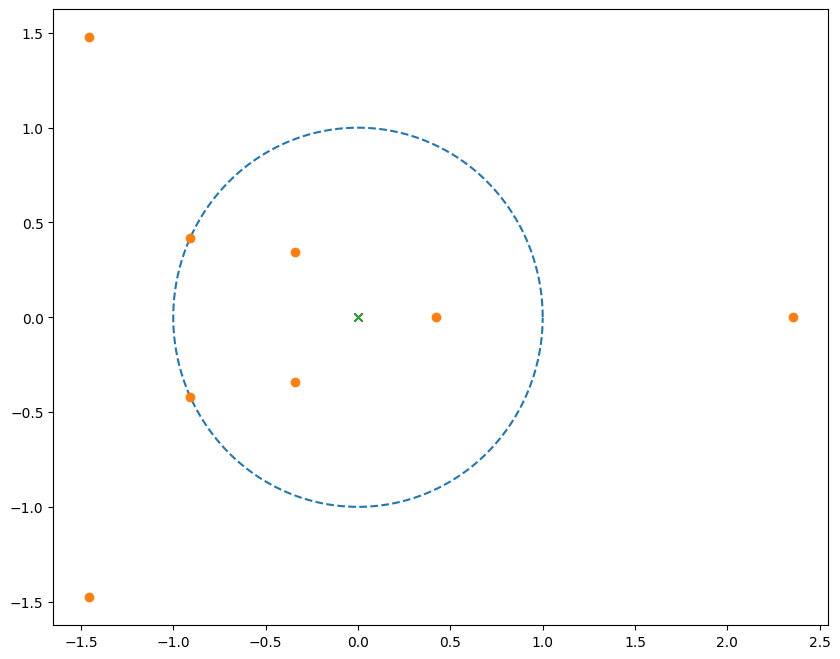

Ceros: [ 2.35557804+0.j         -1.45821868+1.47683726j -1.45821868-1.47683726j
 -0.90734829+0.42037969j -0.90734829-0.42037969j  0.42452425+0.j
 -0.33853409+0.34285651j -0.33853409-0.34285651j]
Polos: [0. 0. 0. 0. 0. 0. 0. 0.]


In [36]:
print('Diagrama de polos y ceros: ')
ztrans.zeropoles(num, den)
zeros, poles, gain = scipy.signal.tf2zpk(num, den)

# Imprime los ceros y polos
print("Ceros:", zeros)
print("Polos:", poles)

#2.5
¿Qué puede concluir acerca de las gráficas anteriores? ¿Qué tipo de filtro es? ¿Cuáles son las frecuencias
de corte? ¿Dónde están ubicados los polos y ceros? ¿Qué puede decir de la estabilidad del filtro?

-Es un filtro pasa baja

-Solo se encuentra un polo ubicado en el 0.0 dentro de la circunferencia unitaria y 8 ceros de los cuales 5 se encuentran dentro de la circunferencia unitaria y 3 fuera de ella

-Se observa que el filtro es estable ya que la respuesta al impulso se estabiliza y teniendo en cuenta la ROC es causal y estable

#2.6
Calcule la respuesta del filtro ante la señal generada previamente. Grafique la señal antes y después de
pasar por el filtro. ¿Qué le ocurrió a la señal?


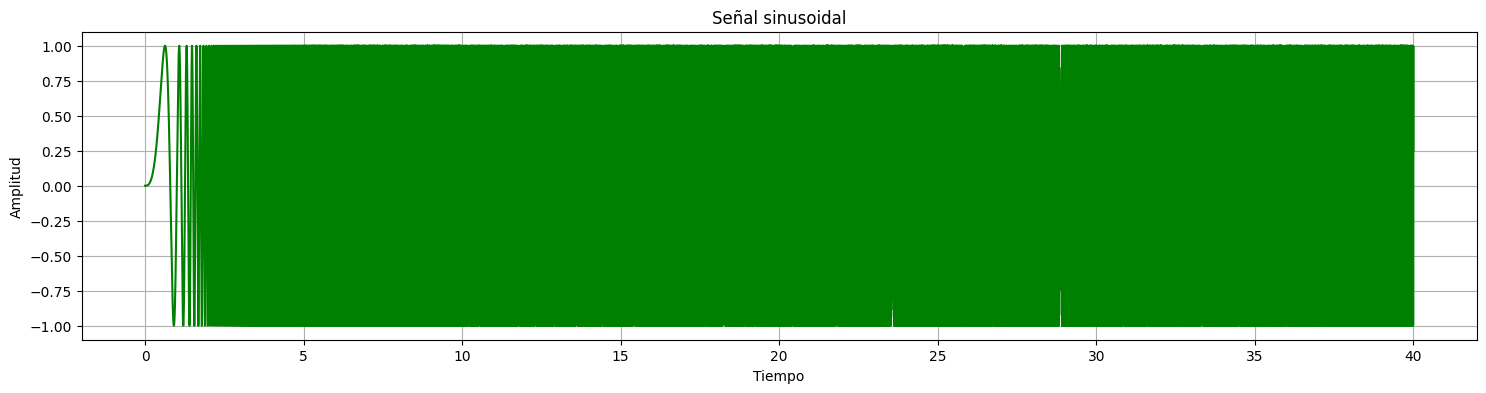

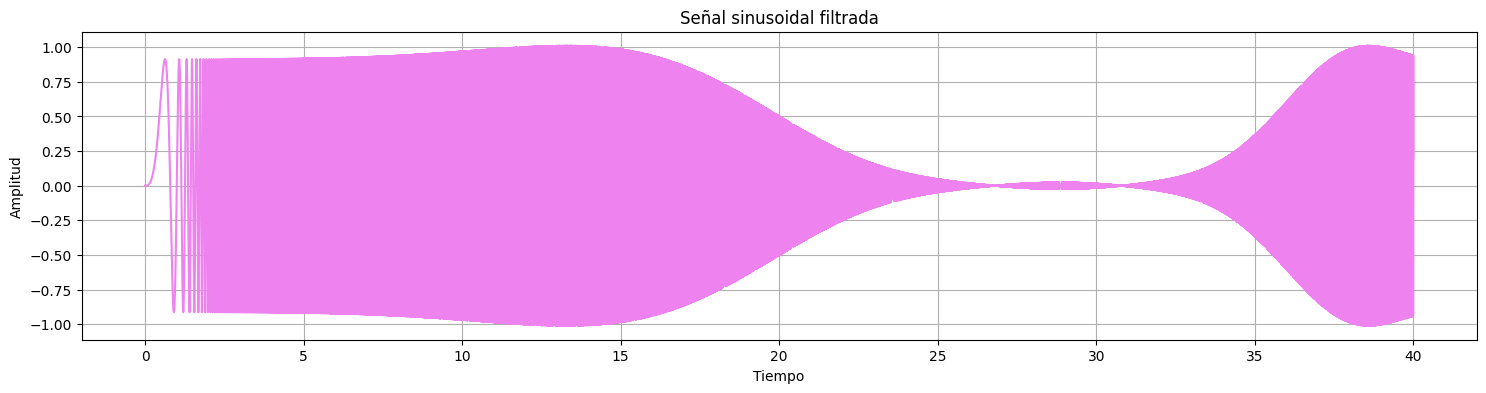

In [37]:
signalf=np.convolve(signa, num, mode='same')

#Señal1
plt.figure(figsize=(18,4))
plt.plot(t,signa, color='green')
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Señal sinusoidal")
plt.grid()
plt.show()

#Señal2
plt.figure(figsize=(18,4))
plt.plot(t,signalf, color = 'violet')
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Señal sinusoidal filtrada")
plt.grid()
plt.show()

a medida que aumenta un tiempo determinado(15),la señal empieza a decrecer hasta el punto de llegar a cero,para mantenerse un tiempo con su amplitud cercana a cero para luego volver a retomar su amplitud original,la grafica es la de un filtro rechazabandas

#2.7
Aumente progresivamente el orden n del filtro (m ́ınimo 3 veces), repita el procedimiento anterior (items3, 4, 5, y 6), y concluya. Que puede decir de la respuesta en frecuencia, y de los polos y ceros.

Ordenes del filtro [  9  54 100]


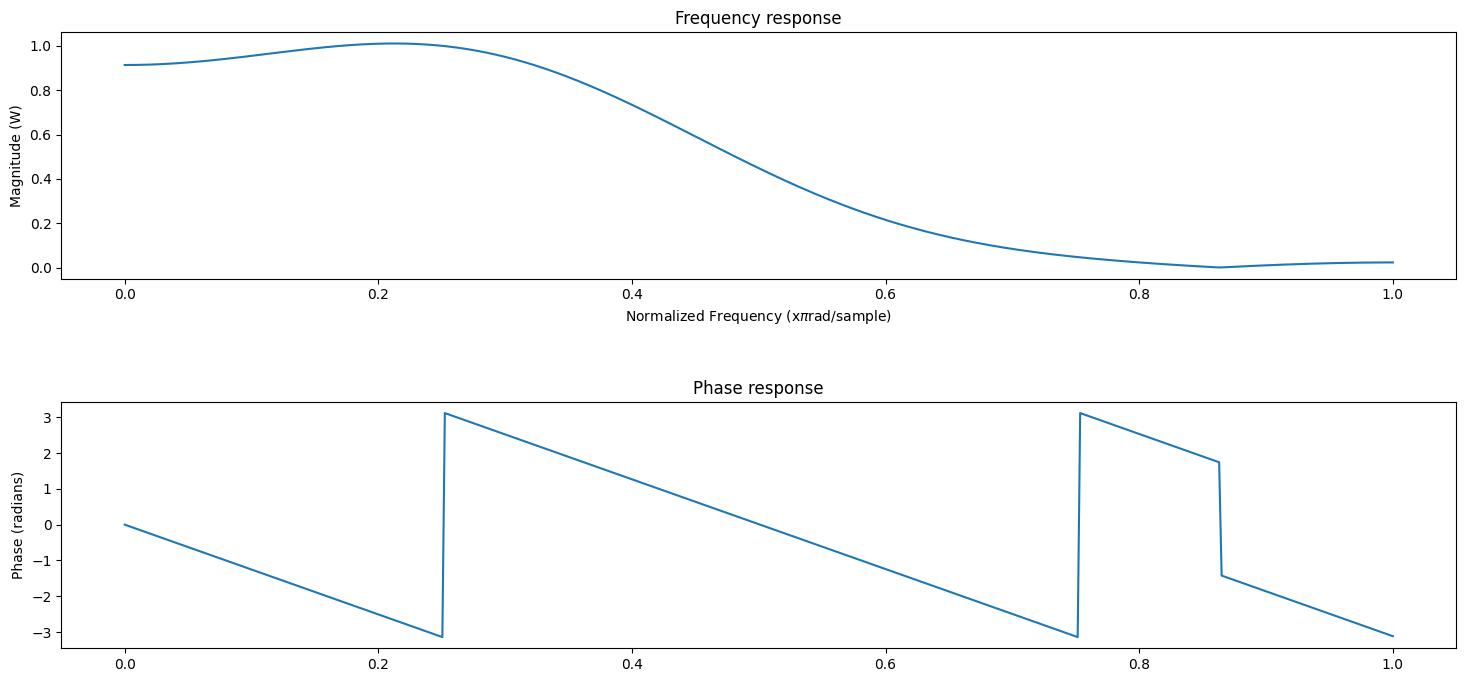

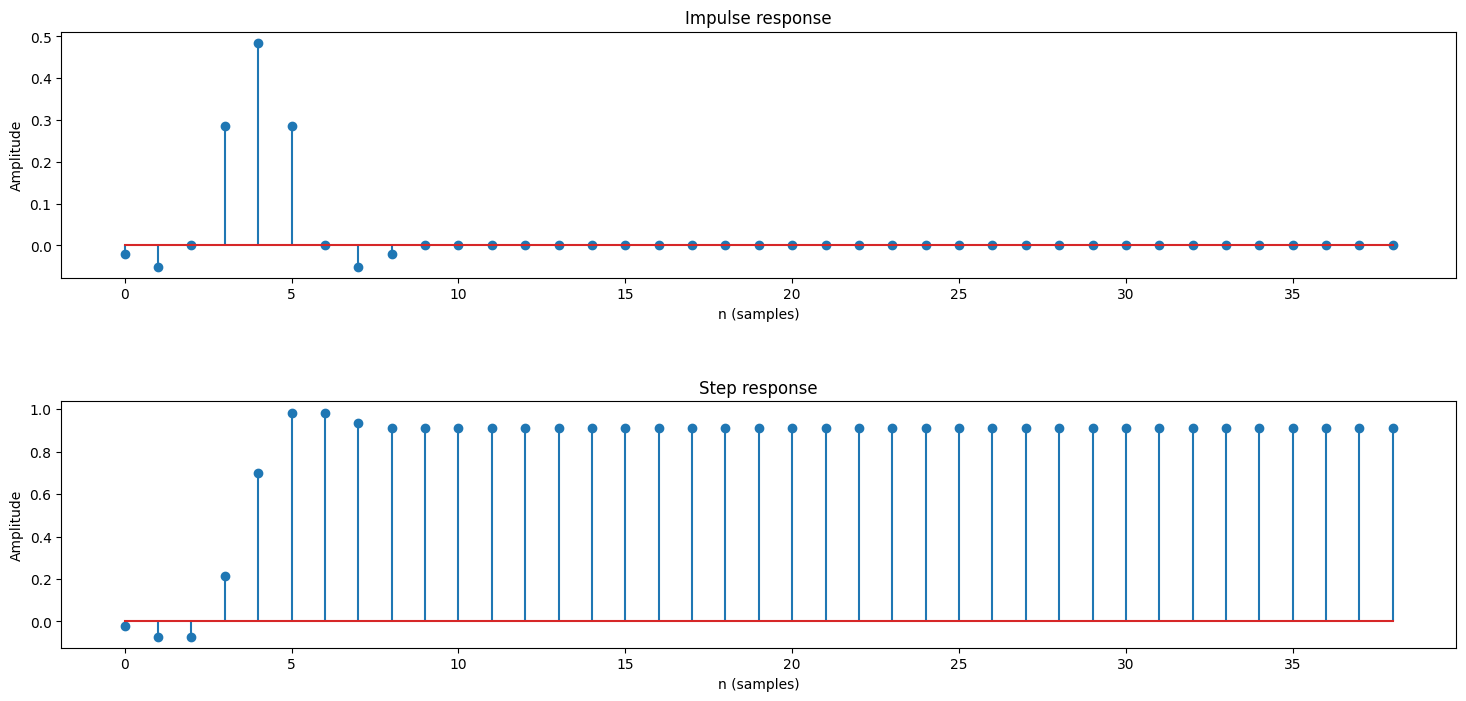

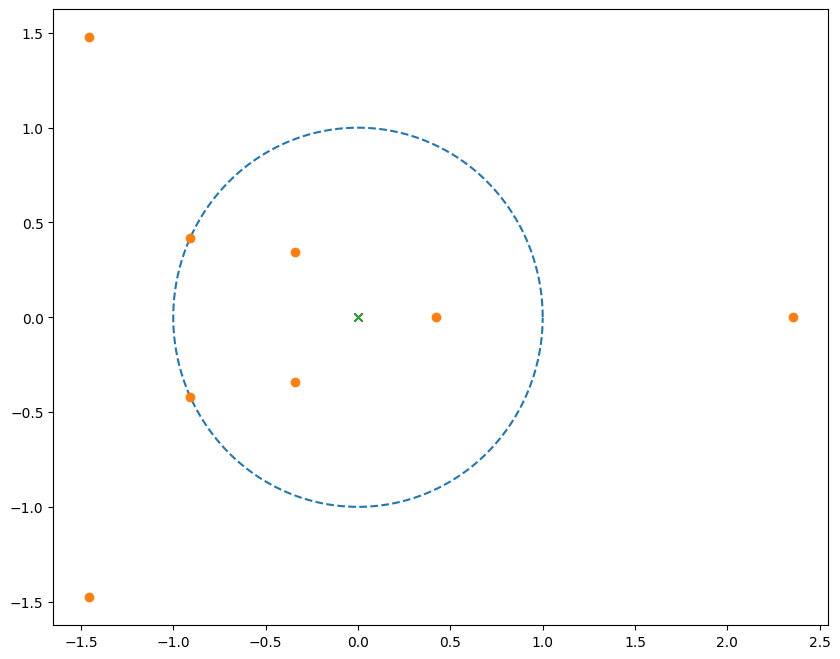

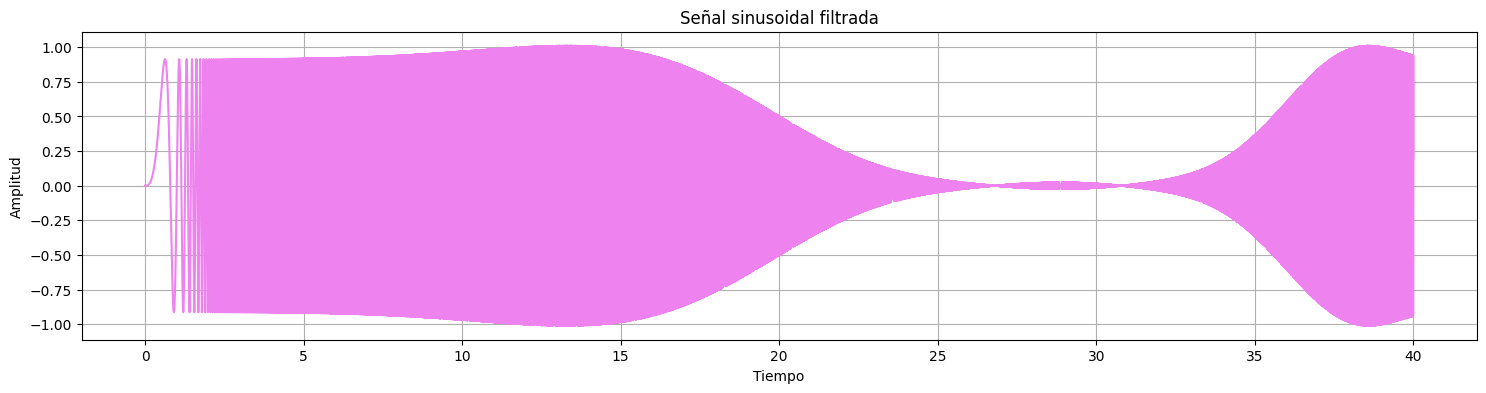

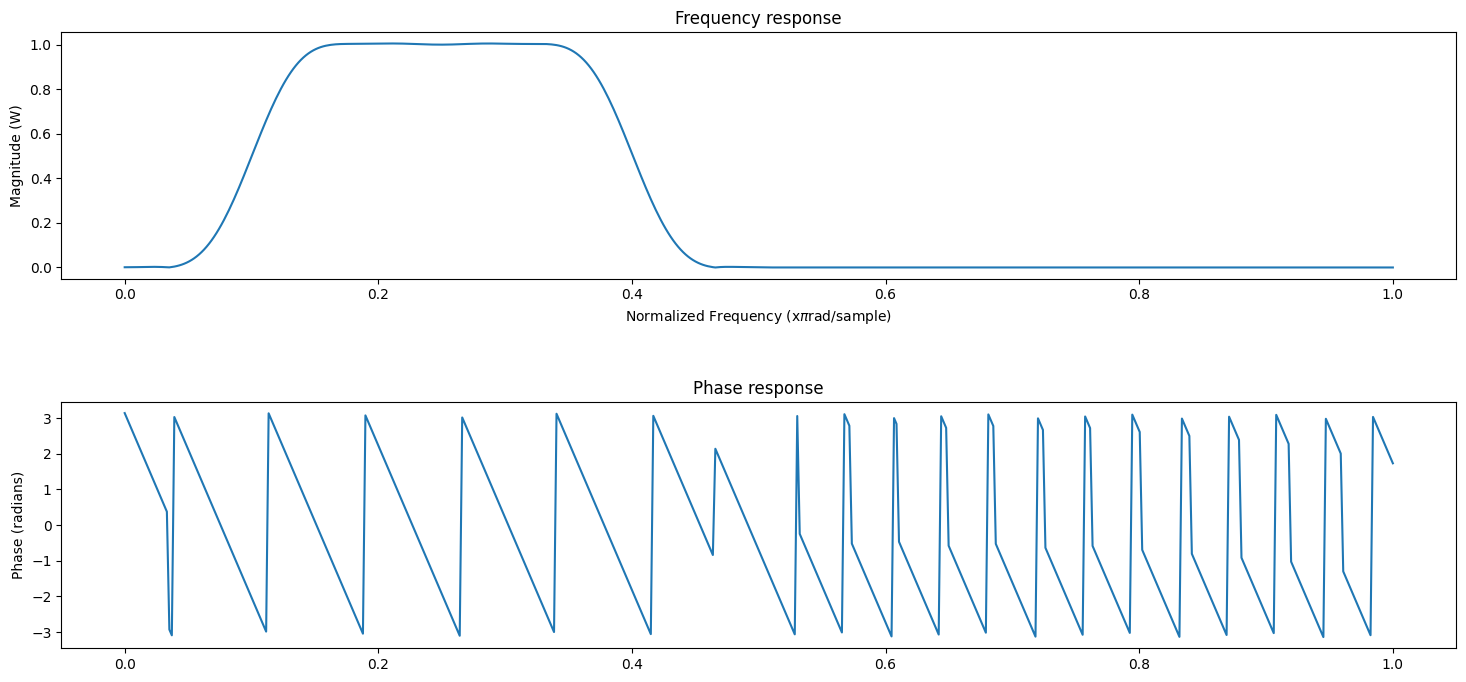

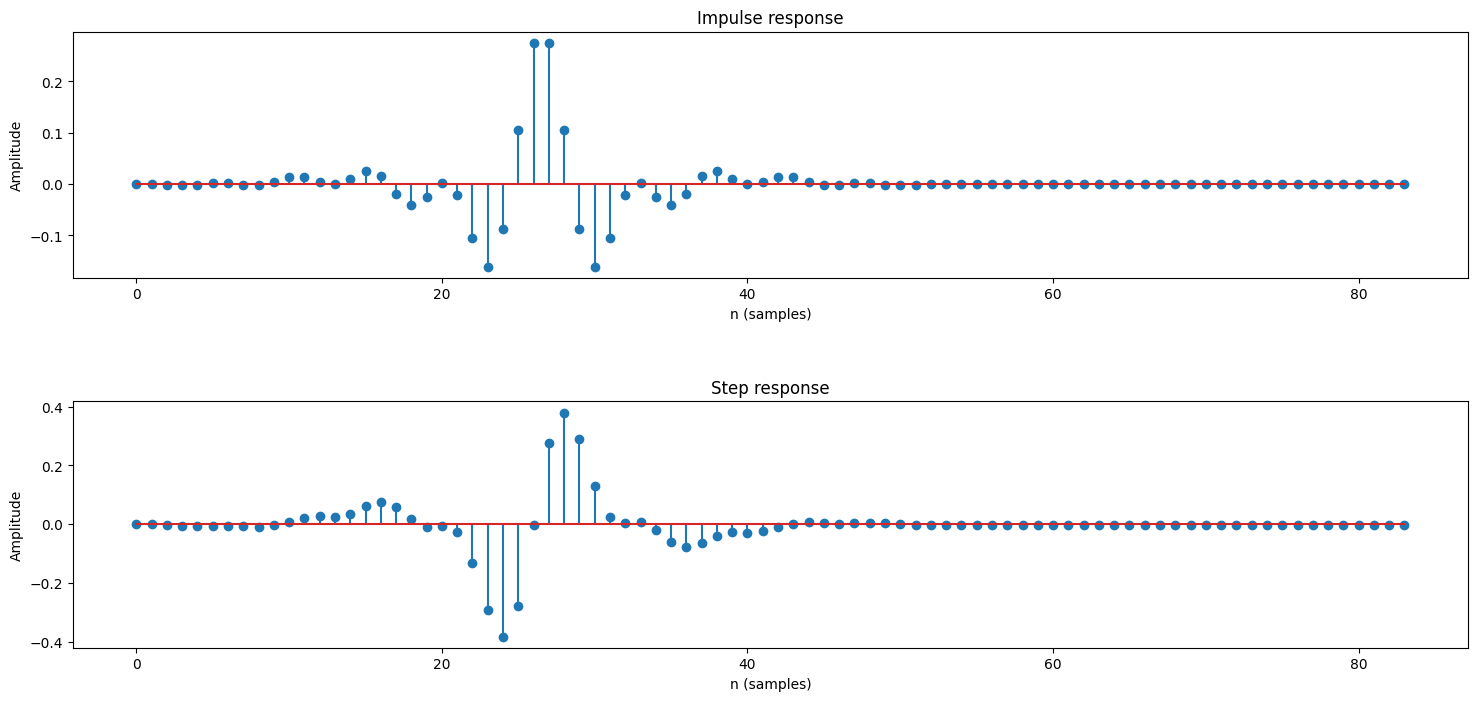

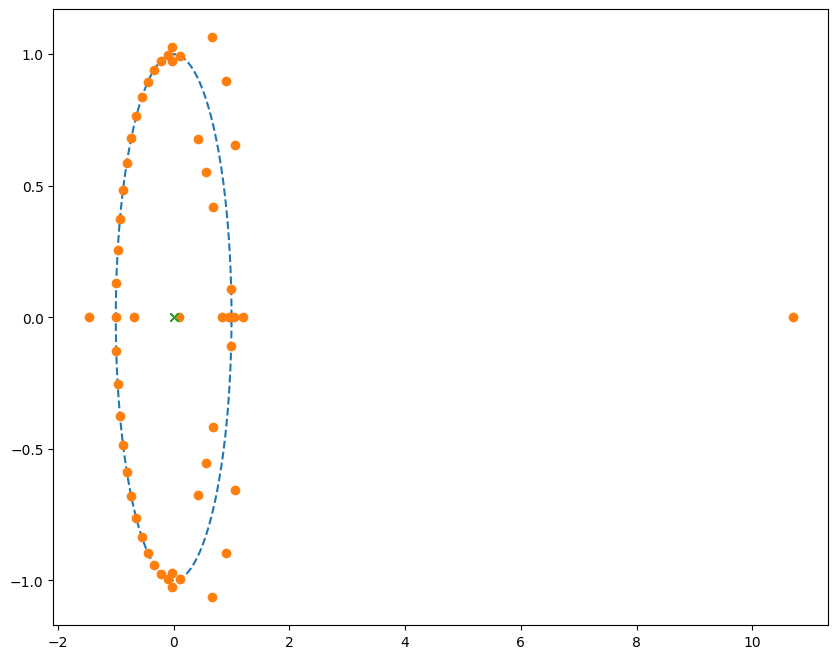

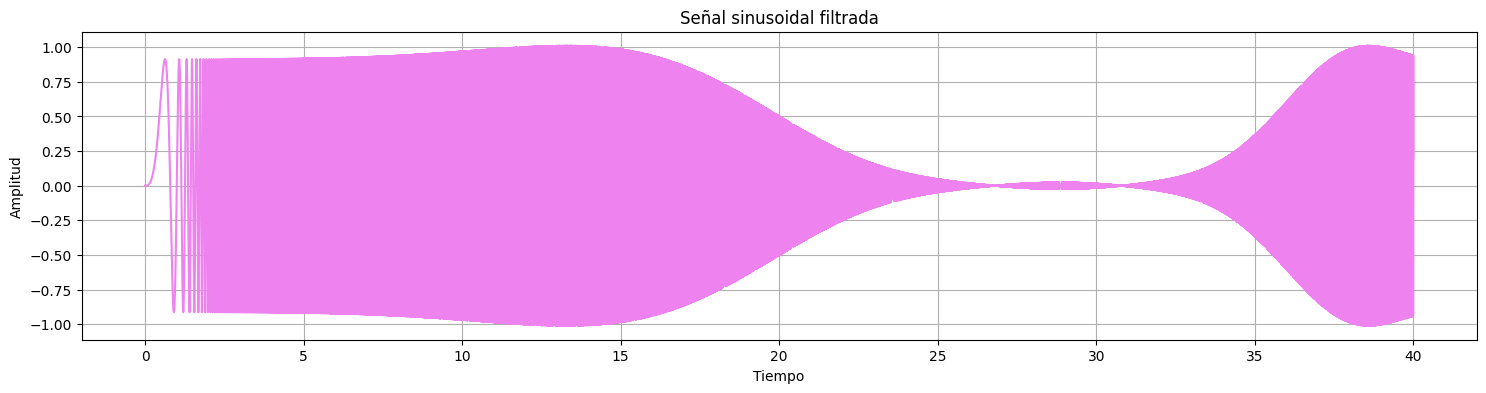

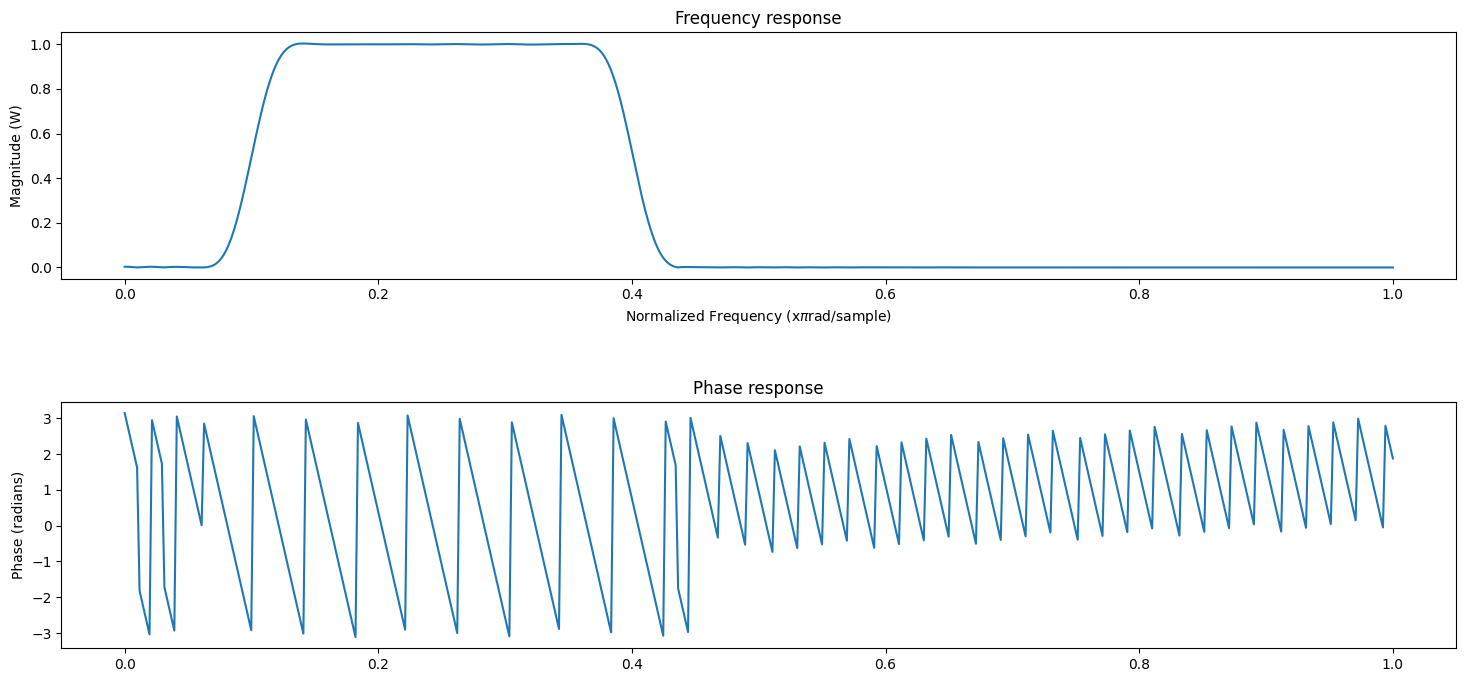

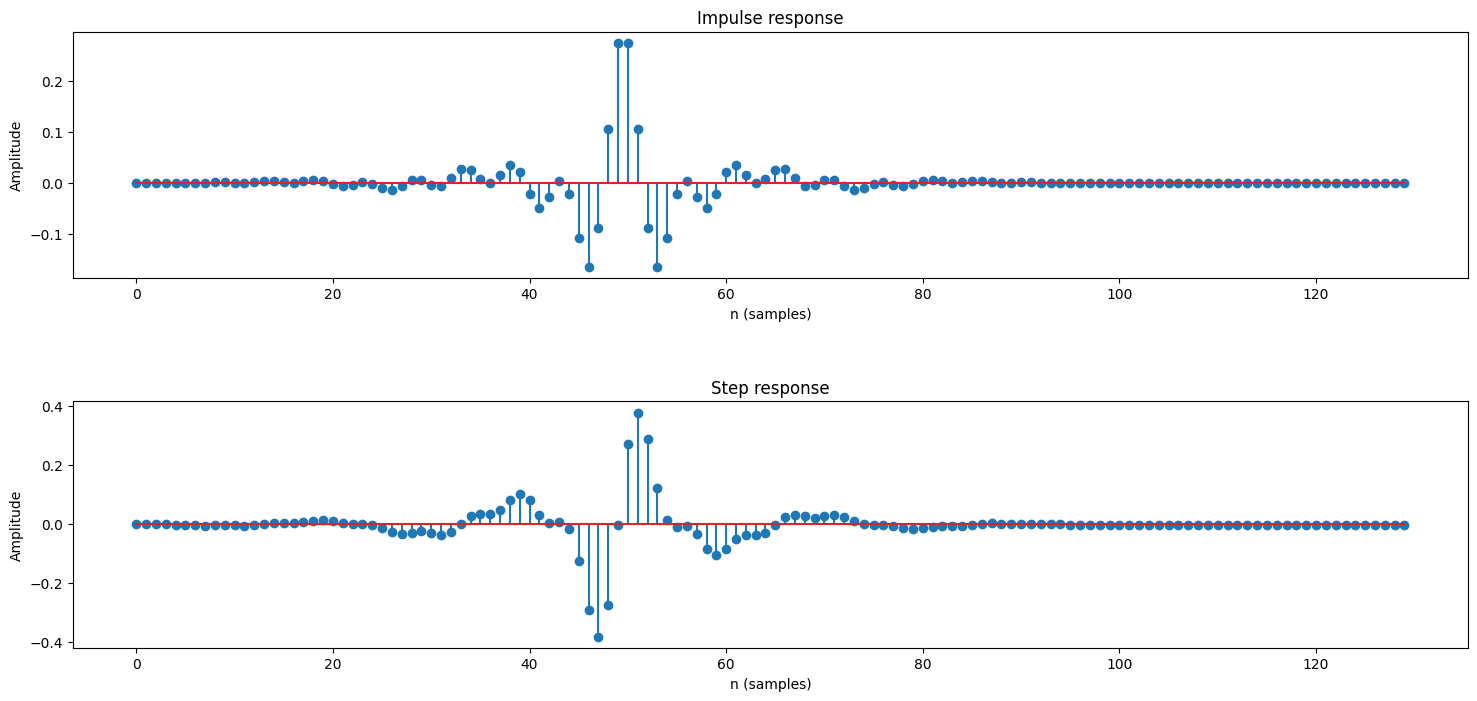

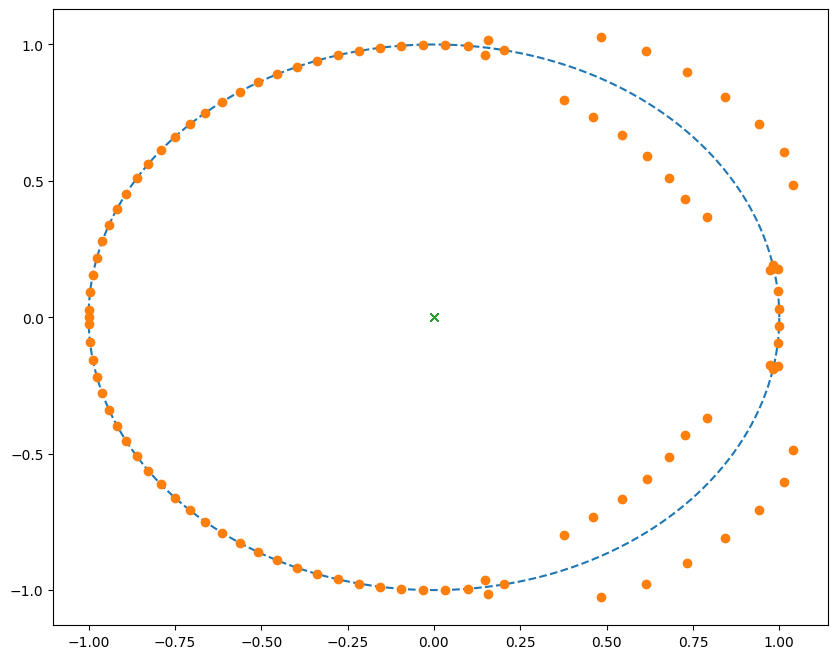

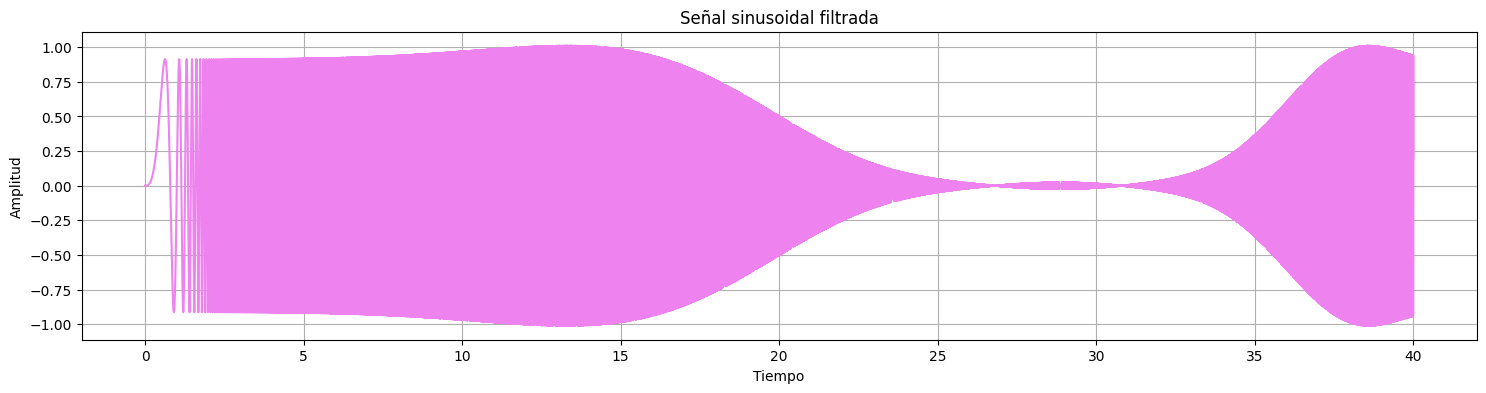

In [38]:
N = np.linspace(9, 100, 3, dtype = int)
print('Ordenes del filtro',N)
for n in N:
    #Se crea un filtro de n órdenes
    num = signal.firwin(n, [0.1, 0.4], pass_zero=False)
    den=np.zeros(n)
    den[0] = 1

    #Frecuencia y fase
    ztrans.mfreqz(num,den)
    #Respuesta al impulso y escalón
    ztrans.impz(num, den)
    #Diagrama de polos y ceros
    ztrans.zeropoles(num, den)

    # Grafica Señal
    plt.figure(figsize=(18,4))
    plt.plot(t,signalf, color = 'violet')
    plt.xlabel("Tiempo")
    plt.ylabel("Amplitud")
    plt.title("Señal sinusoidal filtrada")
    plt.grid()
    plt.show()


Que puede decir de la respuesta en frecuencia, y de los polos y ceros.

Del diagrama de polos y ceros se observa que a mayor orden de filtro se aumentan los ceros y solo se tiene un polo, se observa como que el filtro es pasa bandas y a mayor orden esta mejor representado graficamente


#2.8
Genere una señal sinusoidal cuya frecuencia se incremente en el tiempo de forma cúbica, la señal debe
tener la misma duración (40 seg) y una frecuencia de muestreo de 3000 Hz. Repita los pasos 3, 4, 5 y 6. Concluya de acuerdo a las graficas obtenidas.

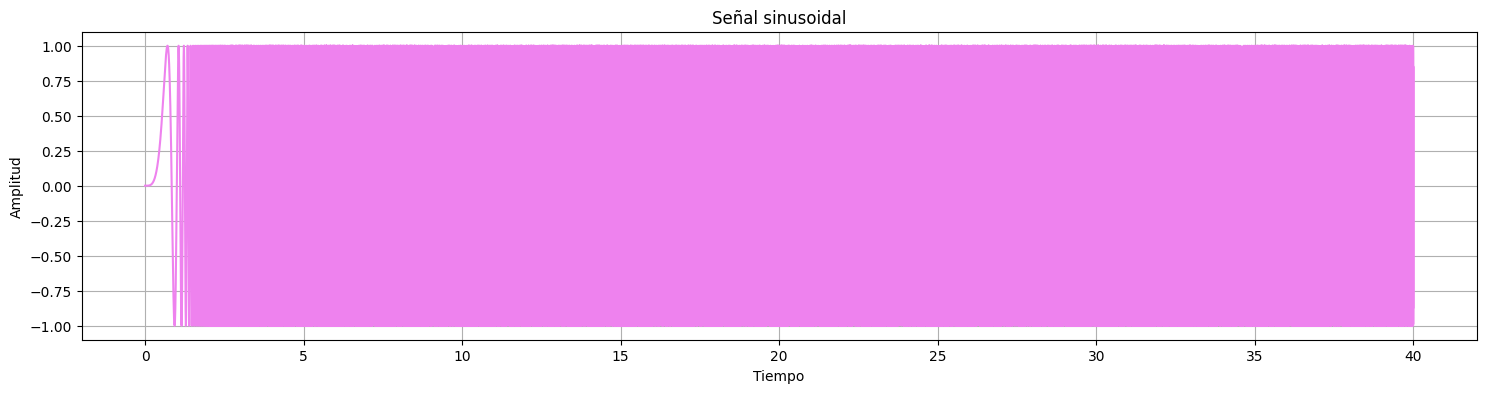

In [45]:
#Parámetros de la señal
fs = 3000 #Valor en Hz de la frecuencia.
t = np.arange(0, 40, 1/fs)
signalc = np.sin(2*pi*t**4) #Señal senoidal de forma cuadrática

plt.figure(figsize=(18,4))
plt.plot(t,signalc, color = 'violet')
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Señal sinusoidal")
plt.grid()
plt.show()

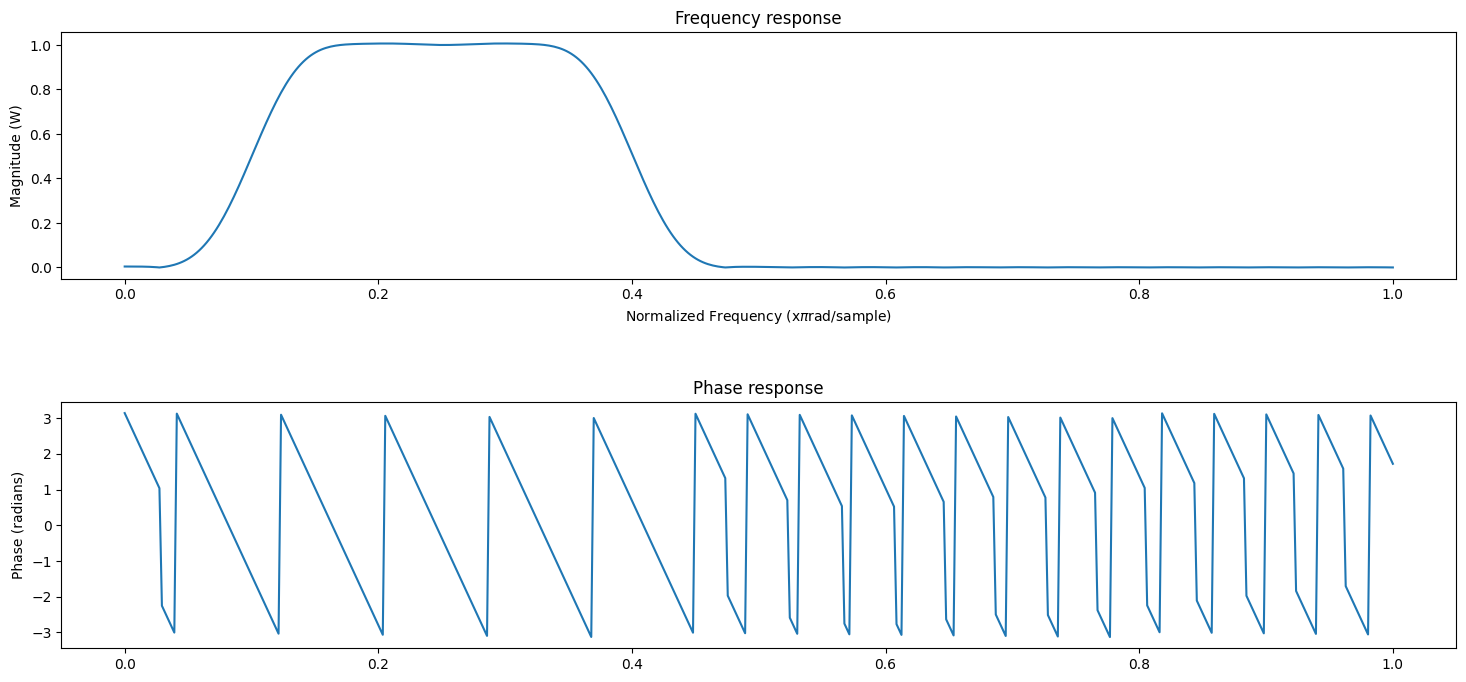

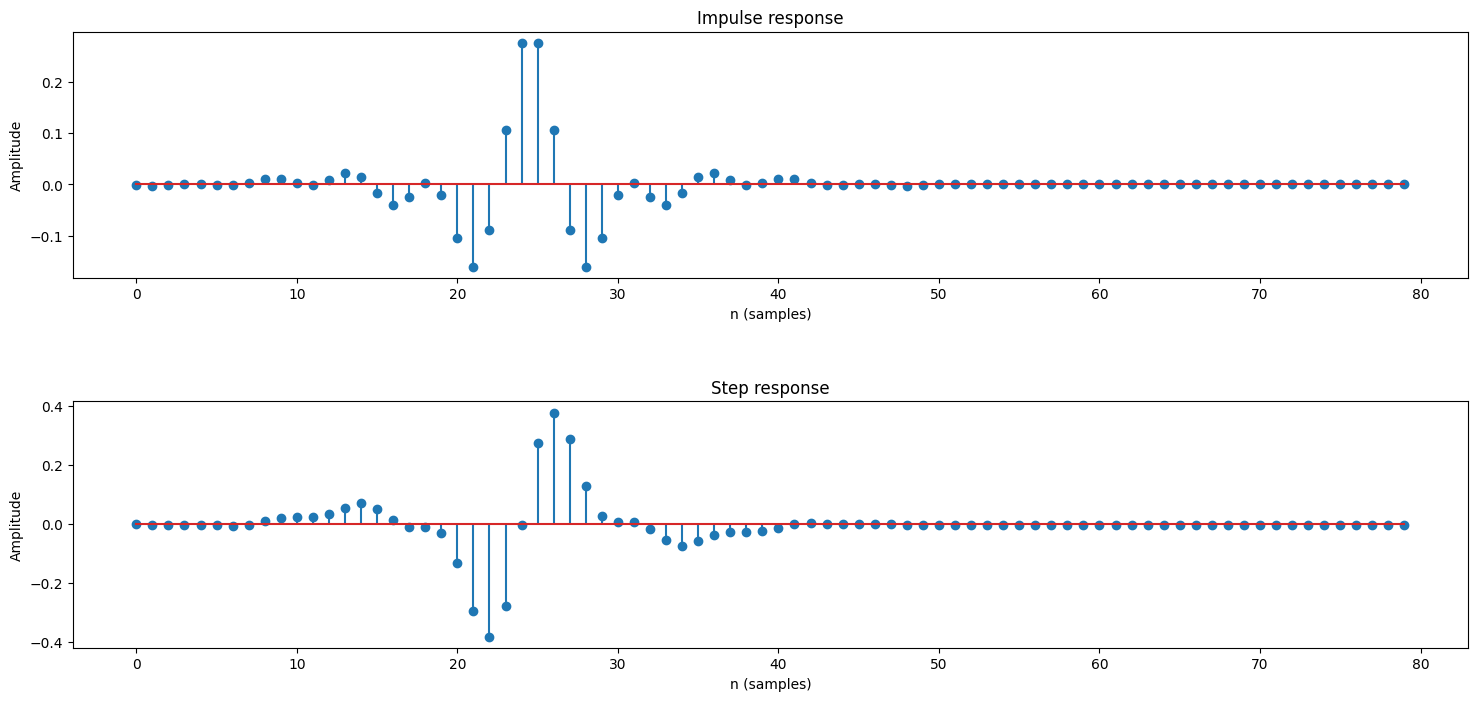

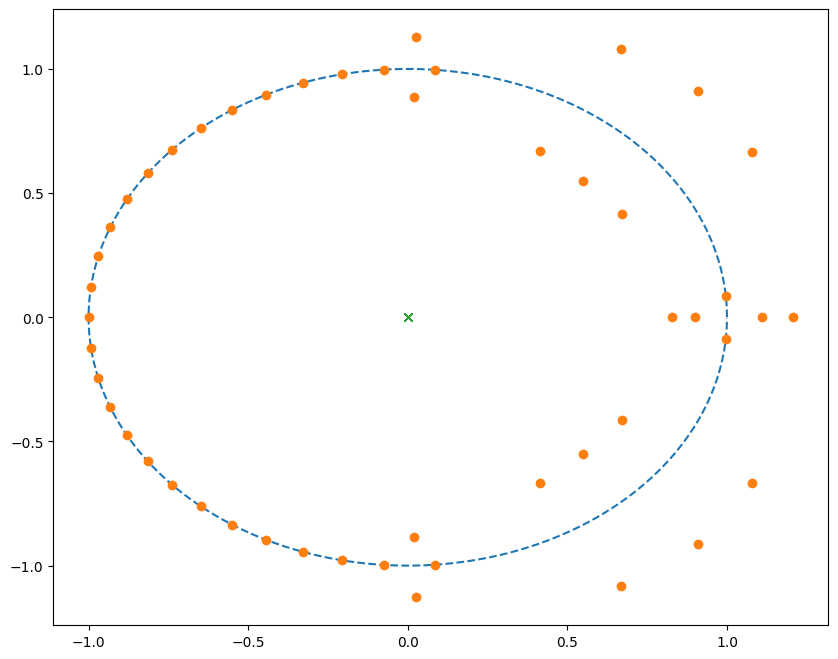

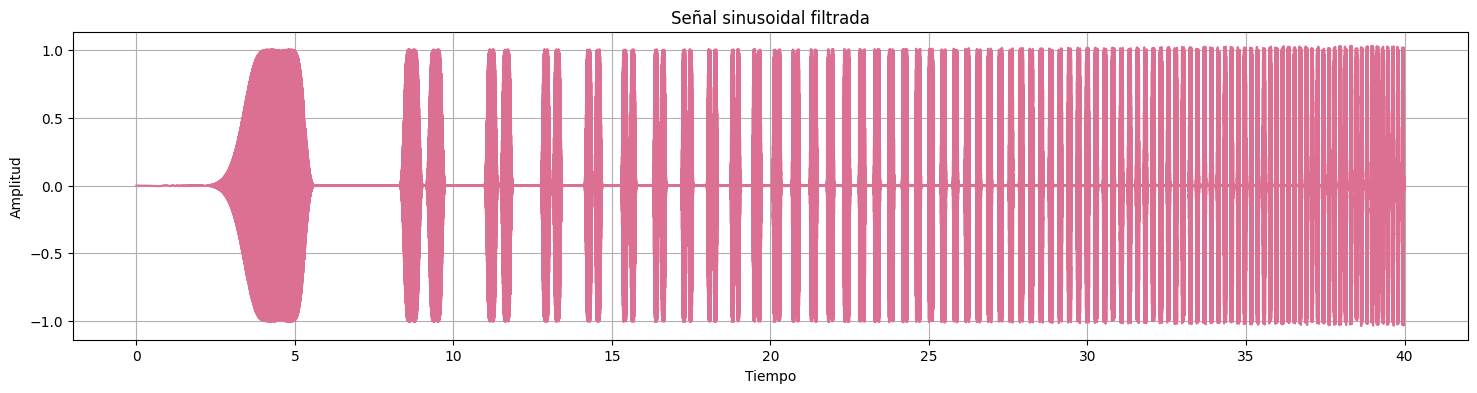

In [47]:
n = 50
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)
den=np.zeros(n)
den[0] = 1
#Frecuencia y fase
ztrans.mfreqz(num,den)
#Respuesta al impulso y escalón
ztrans.impz(num, den)
#Diagrama de polos y ceros
ztrans.zeropoles(num, den)

# Grafica Señal
signalb=np.convolve(signalc, num, mode='same')
plt.figure(figsize=(18,4))
plt.plot(t,signalb, color = 'palevioletred')
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Señal sinusoidal filtrada")
plt.grid()
plt.show()

Se observa que el filtro es pasa bandas,y que a medida que se aumenta n aumentas los polos y ceros, pero los polos siempre se mantiene en el centro del circulo por lo que el sitema siempre es estable

## 3 Agregando polos y ceros al sistema

#3.1
 Retorne al sistema anterior con n = 10.

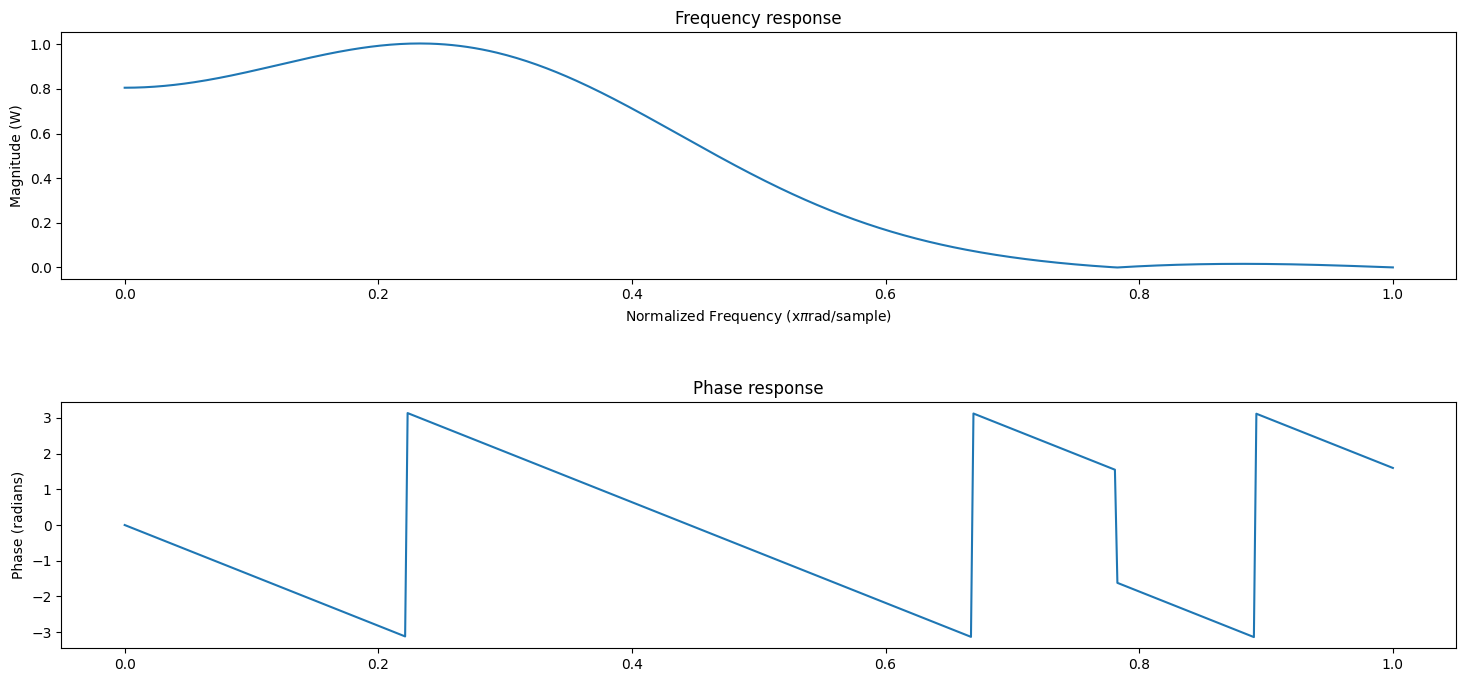

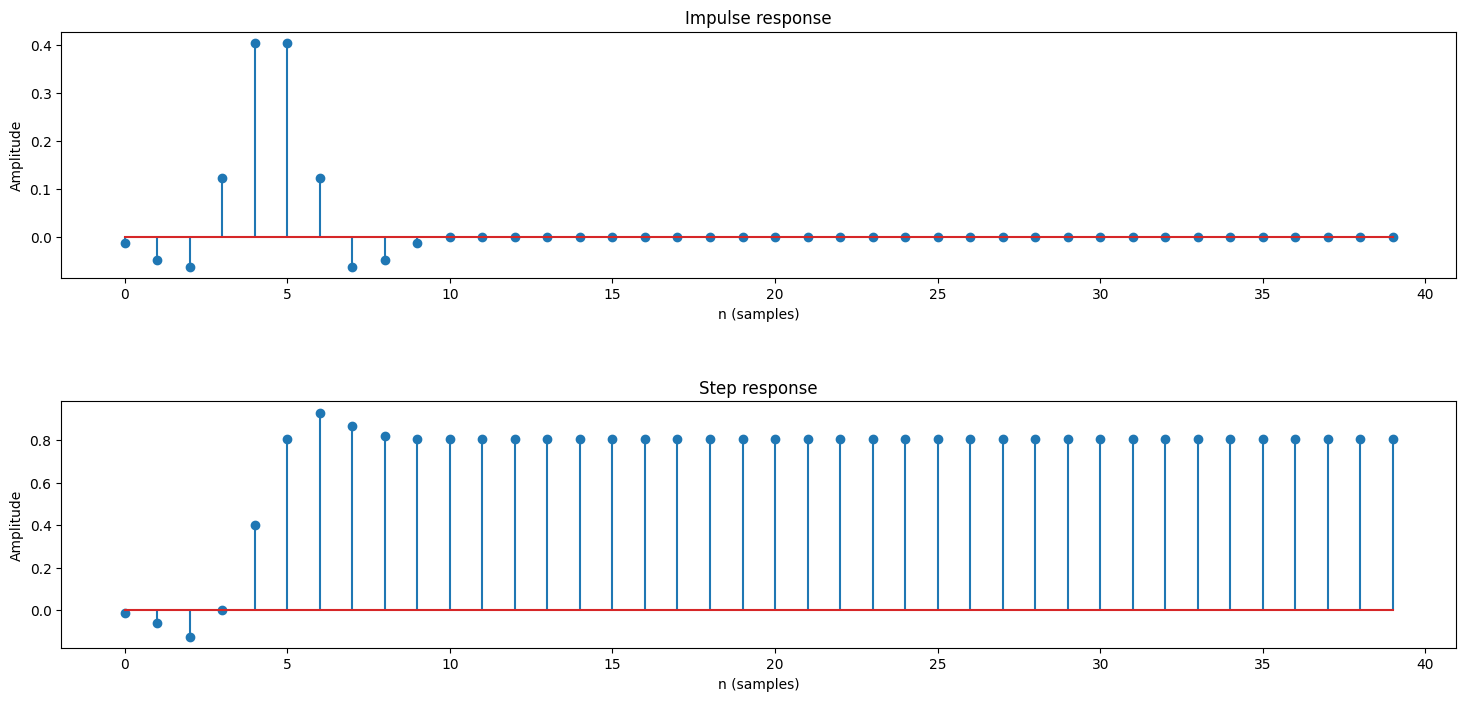

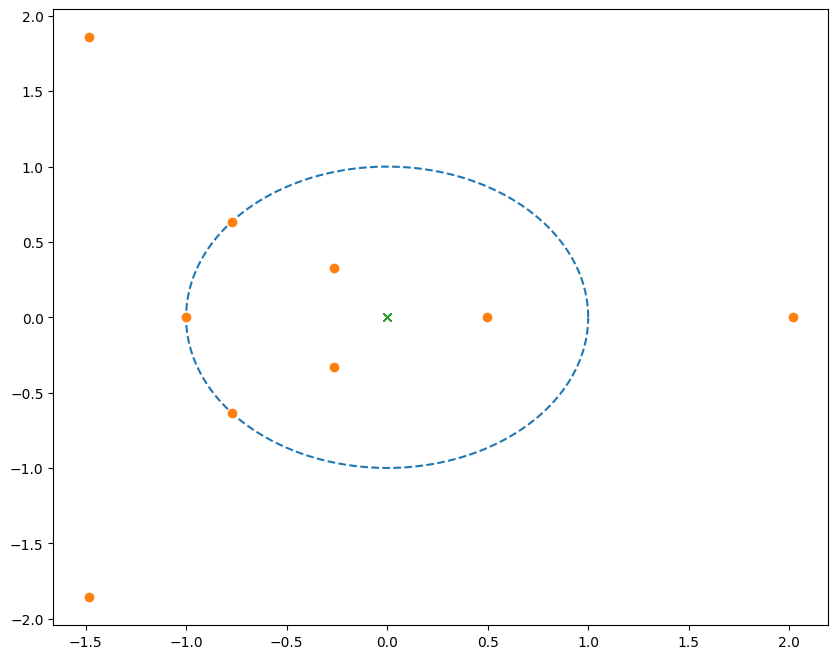

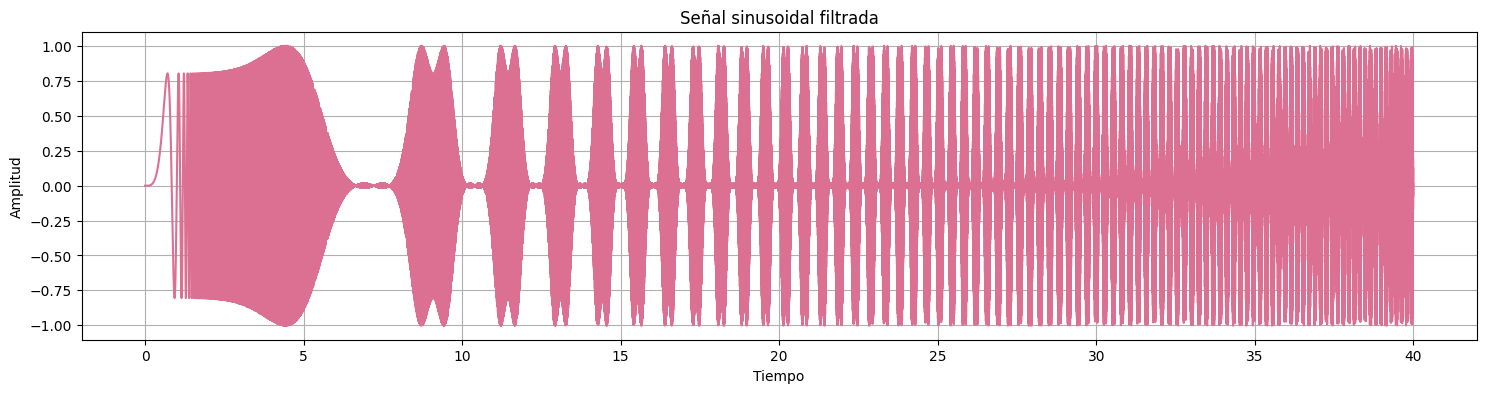

In [53]:
n = 10
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)
den=np.zeros(n)
den[0]=1

n = 10
num = signal.firwin(n, [0.1, 0.4], pass_zero=False)
den=np.zeros(n)
den[0] = 1
#Frecuencia y fase
ztrans.mfreqz(num,den)
#Respuesta al impulso y escalón
ztrans.impz(num, den)
#Diagrama de polos y ceros
ztrans.zeropoles(num, den)

# Grafica Señal
signalb=np.convolve(signalc, num, mode='same')
plt.figure(figsize=(18,4))
plt.plot(t,signalb, color = 'palevioletred')
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.title("Señal sinusoidal filtrada")
plt.grid()
plt.show()

3. Explique el comportamiento del sistema si se agrega de forma independiente:
* Dos ceros conjugados de magnitud 0.8
* Un polo real de magnitud 1.2

Ceros: [-0.4+0.8j -0.4-0.8j]
Polos: [ 1.56619038 -0.76619038]


<Figure size 640x480 with 0 Axes>

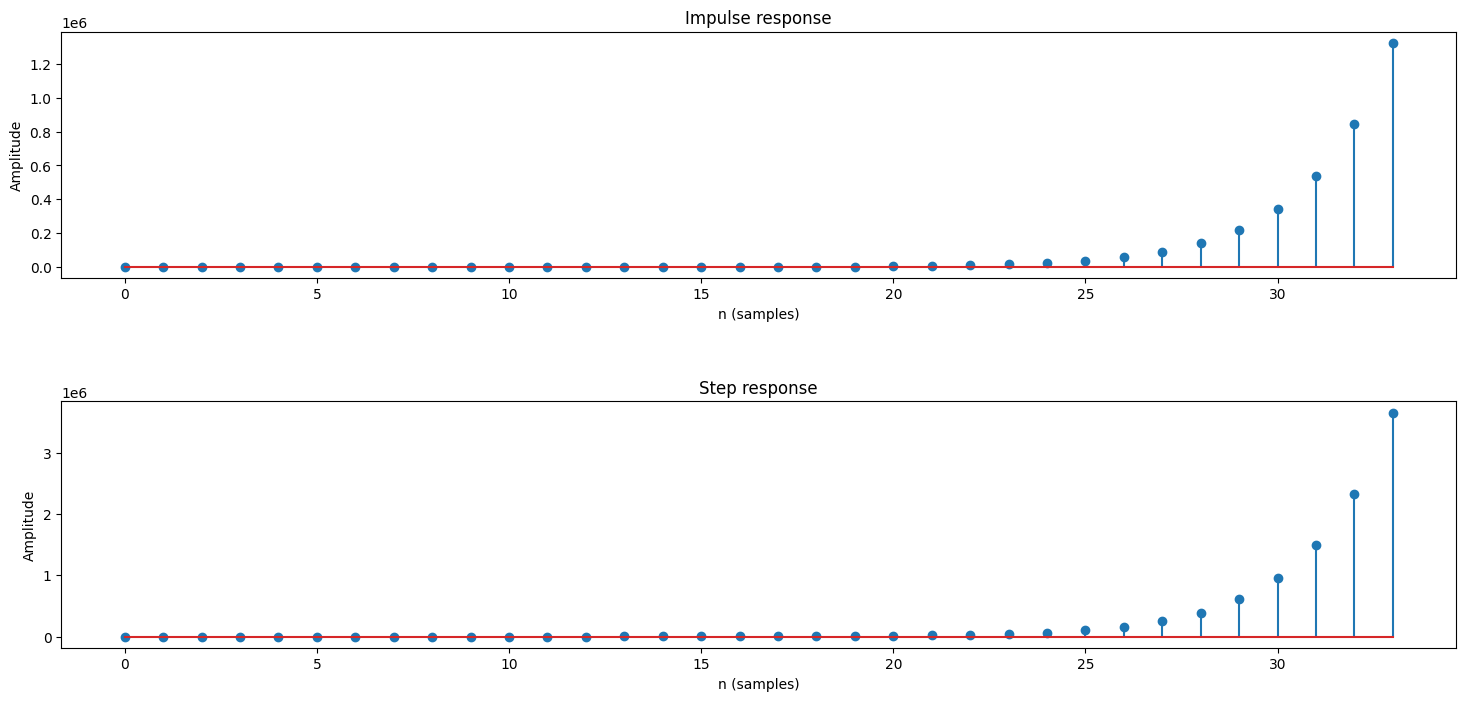

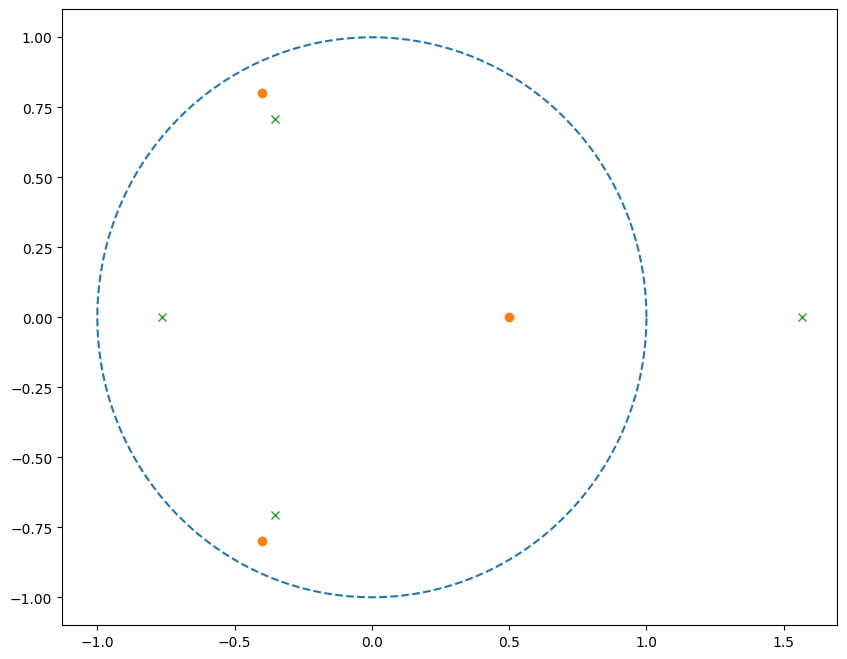

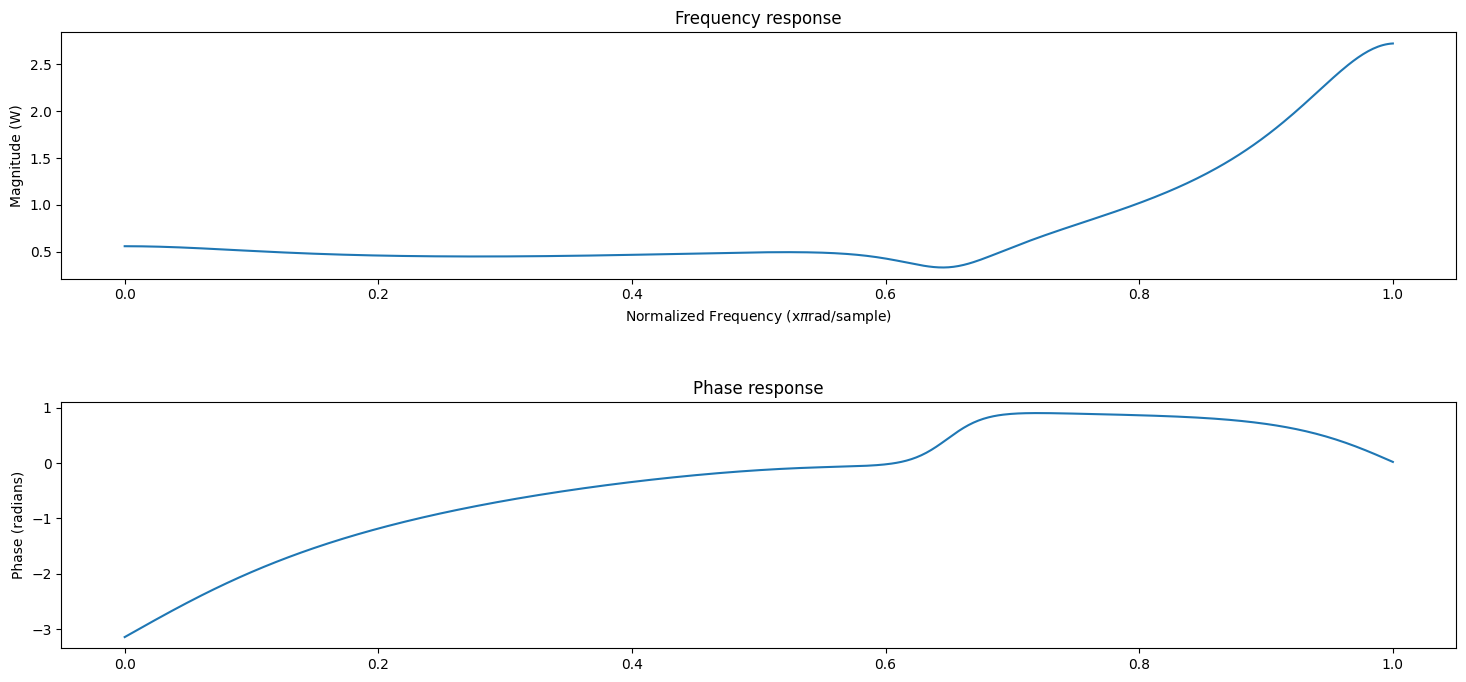

/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


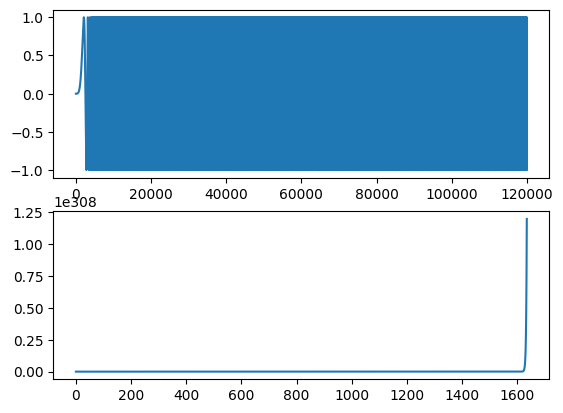

In [61]:
import scipy.signal

# Coeficientes iniciales del numerador y denominador
num = [1.0]  # Solo tienes un cero en z=0 inicialmente
den = [1.0, -0.8]  # Denominador con un polo en z=0.8

# Agregar un polo en z=1.2
den.append(-1.2)

# Agregar dos ceros en z=0.8
num.extend([0.8, 0.8])

# Calcular polos y ceros
zeros, poles, gain = scipy.signal.tf2zpk(num, den)

# Imprimir polos y ceros
print("Ceros:", zeros)
print("Polos:", poles)


ztrans.computeZ(num, den, [0.5], [complex(-np.sqrt(2)/4,np.sqrt(2)/2),complex(-np.sqrt(2)/4,-np.sqrt(2)/2)], signalc)

##Conclusiones

* Teniendo un orden de filtro mayor se puede observar mejor el tipo de filtro ya que puede pasar que se observe un filtro pasa bajas o rechazabandas pero en realidad es un filtro pasa bandas.

* En todas las graficas de la señal filtrada,se dijo que era un filtro rechazabanda,pero al analizando y debatiendo con los compañeros de clase y el profesor,se concluyo que era un filtro pasa bajas y la caida en la amplitud es porque en la señal se presenta aliasing porque la frecuncia de muestreo no es capaz de muestrear
* El diagrama de polos y ceros permite ver la estabilidad y la causalidad o no causalidad